In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import re
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('Reviews.csv')

In [3]:
print("Number of reviews:",len(df))

Number of reviews: 568454


In [30]:
df.head()

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


#Data Cleaning

In [5]:
df.shape

(568454, 10)

In [6]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [0]:
del df['Id']
del df['Time']
del df['UserId']
del df['ProductId']
del df['ProfileName']
del df['HelpfulnessNumerator']
del df['HelpfulnessDenominator']

In [8]:
df.head(3)

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...


In [9]:
df['Text'] = df['Text'] + ' ' + df['Summary'] 
del df['Summary']
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [0]:
def score_sentiment(score):
    # Replace scores of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(score == 1 or score == 2 or score == 3):
        return 0
    else:
        return 1
df.Score = df.Score.apply(score_sentiment)

In [11]:
df.head(3)

,Score,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,1,This is a confection that has been around a fe...


In [12]:
df.isna().sum()

Score     0
Text     27
dtype: int64

In [0]:
df.Text.fillna("",inplace = True)

In [18]:
df.isna().sum()

Score    0
Text     0
dtype: int64

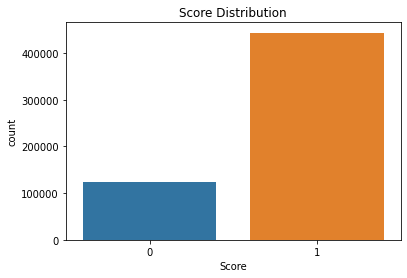

In [19]:
ax = plt.axes()
sns.countplot(df.Score,ax=ax)
ax.set_title('Score Distribution')
plt.show()

#Data Preprocessing

In [20]:
# printing some random reviews
sent_0 = df['Text'].values[0]
print(sent_0)
print("="*50)

sent_600 = df['Text'].values[600]
print(sent_600)
print("="*50)

sent_800 = df['Text'].values[800]
print(sent_800)
print("="*50)

sent_1200 = df['Text'].values[1200]
print(sent_1200)
print("="*50)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Good Quality Dog Food
I've eaten other brands of unsalted potato chips and they've always been terrible.  I didn't expect much when I bought these.  But after I tasted them I was amazed.  I have never enjoyed unsalted potato chips before these.  They have a natural potato flavor with thick, crunchy chips.  The only bad thing is the bag is a pain to open.  Use scissors and save yourself the aggravation. Fantastic
the first time i ordered this it came all melted but amazon was quick to remedy the situation by sending me another of the product and it was great thank you choclate
These are not as good at Houston's Samba Grill but they tasted great. The texture is different but in lieu of having these on a daily basis, I have found

In [21]:
# remove urls from text 
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_600 = re.sub(r"http\S+", "", sent_600)

print(sent_0)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Good Quality Dog Food


In [22]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_600, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Good Quality Dog Food
I've eaten other brands of unsalted potato chips and they've always been terrible.  I didn't expect much when I bought these.  But after I tasted them I was amazed.  I have never enjoyed unsalted potato chips before these.  They have a natural potato flavor with thick, crunchy chips.  The only bad thing is the bag is a pain to open.  Use scissors and save yourself the aggravation. Fantastic


In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:
sent_1200 = decontracted(sent_1200)
print(sent_1200)
print("="*50)

These are not as good at Houston is Samba Grill but they tasted great. The texture is different but in lieu of having these on a daily basis, I have found something that I can make. I would surely recommend these to anyonr. Love Taro


In [25]:
#remove words with numbers 
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Good Quality Dog Food


In [26]:
#remove spacial character
sent_1200 = re.sub('[^A-Za-z0-9]+', ' ', sent_1200)
print(sent_1200)

These are not as good at Houston is Samba Grill but they tasted great The texture is different but in lieu of having these on a daily basis I have found something that I can make I would surely recommend these to anyonr Love Taro


In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [28]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 568454/568454 [03:33<00:00, 2663.25it/s]


In [29]:
preprocessed_reviews[1900]

'sort health nut weened highly palatable junk food junk food delicious ai not good conversely healthy food bad rep disgusting honestly think something requires training acclimatization really like popchips not taste absolutely amazing honest someone trying kick junk food diet good way fulfill craving without succumbing unhealthier junk foods bag calories helpful portion control taste great not amazing not awful sure better tasting chips much unhealthier tried small bags popchips vending machine recommend buy case not tried flavors bought case little disappointed half flavors box fortunately boyfriend disagree tastes good likes flavors not like vice versa works great us probably work great family situations parties people usually not tastes however plan consuming bags time almost guarantee couple flavors not like might worth buy couple bags flavors like not accustomed taste healthy food might not enjoy first either way pop chips worth try probably not case though recommend trying flavor

#Featurization

In [0]:
X=preprocessed_reviews
y=np.array(df['Score'])

In [0]:
from sklearn.model_selection  import train_test_split
#Splitting X and y into Train, Test And CrossValidation
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.3)

**BAG OF WORDS

In [33]:
count_vect = CountVectorizer() 
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (568454, 127720)
the number of unique words  127720


Applying Linear SVM on BOW

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train=count_vect.fit_transform(X_train)
X_cv=count_vect.transform(X_cv)
X_test=count_vect.transform(X_test)

In [0]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

In [0]:
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

alpha = [10**-4, 10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]#alpha=1/C
auc_train=[]
auc_cv=[]

for a in alpha:
    model=SGDClassifier(alpha=a) #Try Log Loss
    svm=CalibratedClassifierCV(model, cv=3) 
    svm.fit(X_train,y_train)
    probcv=svm.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=svm.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))

In [0]:
optimal_alpha= alpha[auc_cv.index(max(auc_cv))]
alpha=[math.log(x) for x in alpha]#converting values of alpha into logarithm

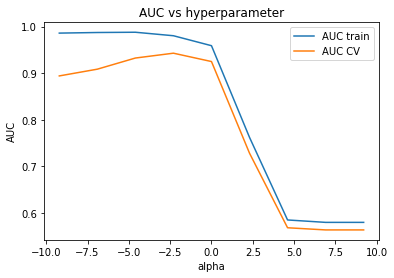

optimal alpha for which auc is maximum :  0.1


In [38]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha, auc_train, label='AUC train')
ax.plot(alpha, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

In [0]:
#training our model for alpha=0.1
#ROC curve
model=SGDClassifier(alpha=0.1)
svm=CalibratedClassifierCV(model, cv=3)
svm.fit(X_train,y_train)
predi=svm.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=svm.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)

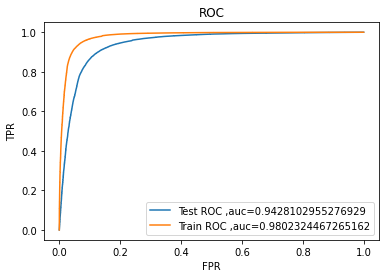

In [40]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

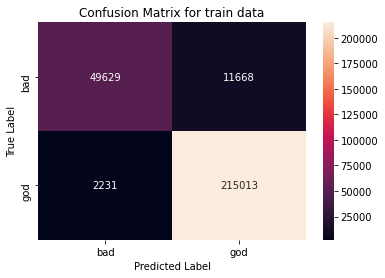

In [41]:
#confusion matrix for train data
#Confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix

predic=svm.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_train, predic)
class_label = ["bad", "god"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

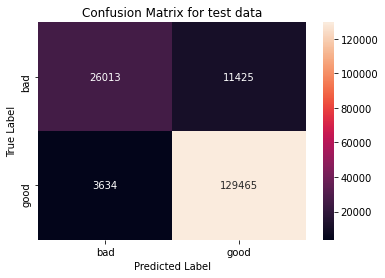

In [42]:
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix

predic=svm.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["bad", "good"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
#confusion matrix for test data
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,predic))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.69      0.78     37438
           1       0.92      0.97      0.95    133099

    accuracy                           0.91    170537
   macro avg       0.90      0.83      0.86    170537
weighted avg       0.91      0.91      0.91    170537



In [44]:
#top 10 positive features
all_features = count_vect.get_feature_names()
model=SGDClassifier(alpha=0.1)
model.fit(X_train,y_train)
weight=model.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print(all_features[i])

Top 10 positive features :
great
best
good
love
delicious
excellent
loves
perfect
favorite
yummy


In [45]:
#top 10 negative features
print('Top 10 negative features :')
for i in list(neg_indx[0][0:10]):
    print(all_features[i])

Top 10 negative features :
not
ok
disappointed
okay
disappointing
worst
awful
unfortunately
terrible
horrible
